# Jamboree Admission Prediction Project - Interpretable ML for Student Success
### **Introduction**

This project predicts students’ **chances of admission** to graduate programs using the Jamboree Education dataset.
By applying Linear and Ridge Regression, it identifies how factors like CGPA, GRE, TOEFL, LOR, SOP, and Research experience influence admission outcomes.
### **Objective**
Jamboree’s Data Science team seeks to 
understand which factors most strongly influence graduate admission chances and how 
these factors interact. The company aims to use **Linear Regression modeling** to predict a 
student’s likelihood of admission, helping counselors provide personalized guidance. 

## Data Understanding and Cleaning

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [42]:
df=pd.read_csv(r"D:\jamboree_edn_\jamboree_edn.csv")
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [43]:
df=df.rename(columns={'Serial No ':'serial_no','GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score',
                   'University Rating':'University_Rating','Chance of Admit ':'Chance_of_Admit'})

In [44]:
df.columns

Index(['serial_no', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [45]:
df=df.drop('serial_no',axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [47]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [48]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Exploratory Data Analysis

In [49]:
df.value_counts('Research')

Research
1    280
0    220
Name: count, dtype: int64

In [50]:
df.value_counts('University_Rating')

University_Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

<Axes: xlabel='SOP'>

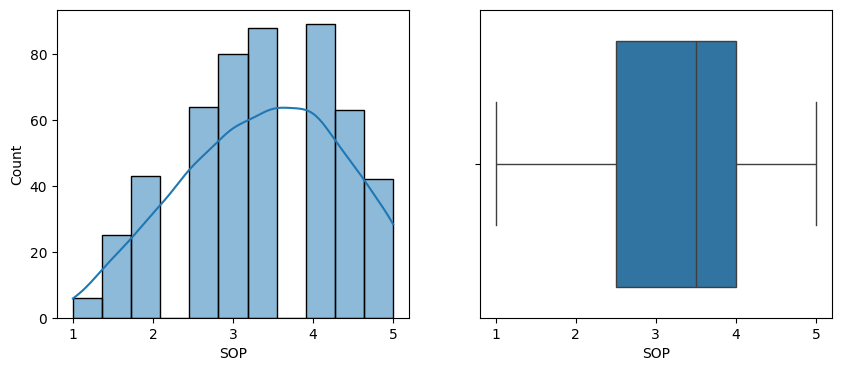

In [51]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df,x='SOP',kde=True)
plt.subplot(1,2,2)
sns.boxplot(df,x='SOP')

<Axes: xlabel='LOR'>

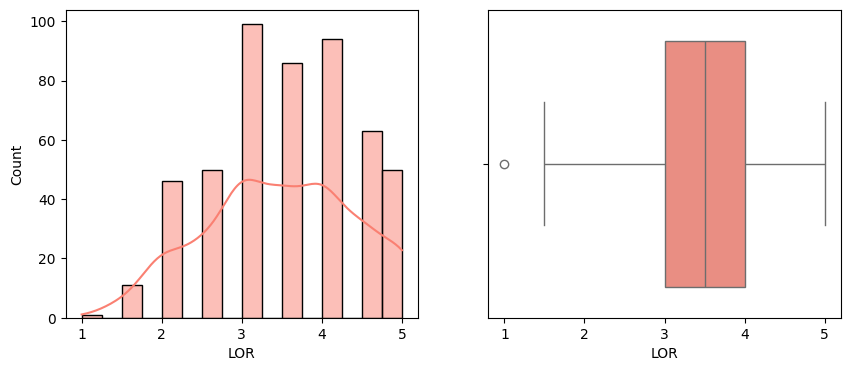

In [52]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df,x='LOR',kde=True,color='salmon')
plt.subplot(1,2,2)
sns.boxplot(df,x='LOR',color='salmon')

<Axes: xlabel='CGPA'>

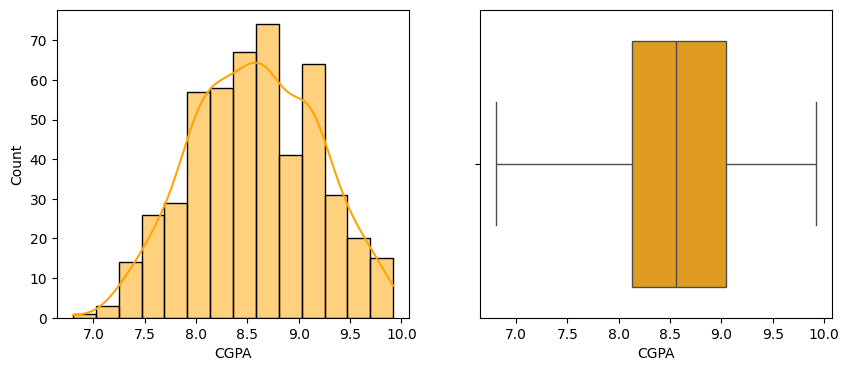

In [53]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df,x='CGPA',kde=True,color='orange')
plt.subplot(1,2,2)
sns.boxplot(df,x='CGPA',color='orange')

<Axes: xlabel='TOEFL_Score'>

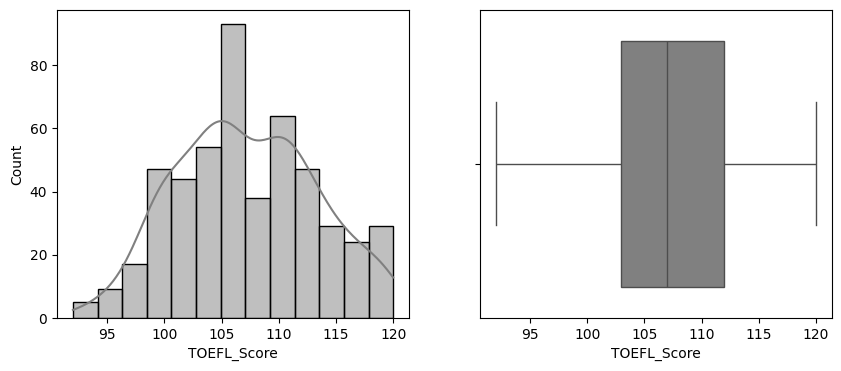

In [54]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df,x='TOEFL_Score',kde=True,color='grey')
plt.subplot(1,2,2)
sns.boxplot(df,x='TOEFL_Score',color='grey')

<Axes: xlabel='GRE_Score', ylabel='Count'>

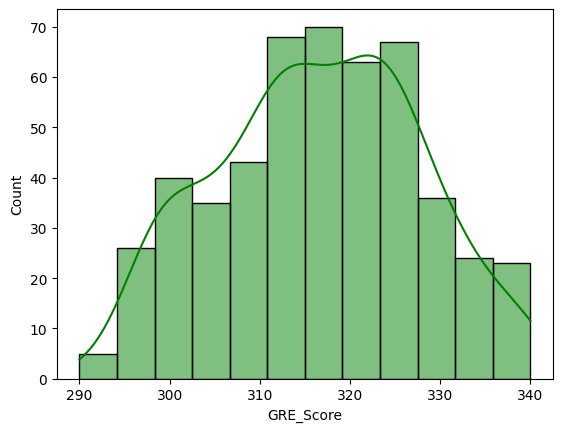

In [55]:
sns.histplot(df,x='GRE_Score',kde=True,color='green')

In [56]:
df.head(1)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


<Axes: xlabel='Chance_of_Admit', ylabel='Count'>

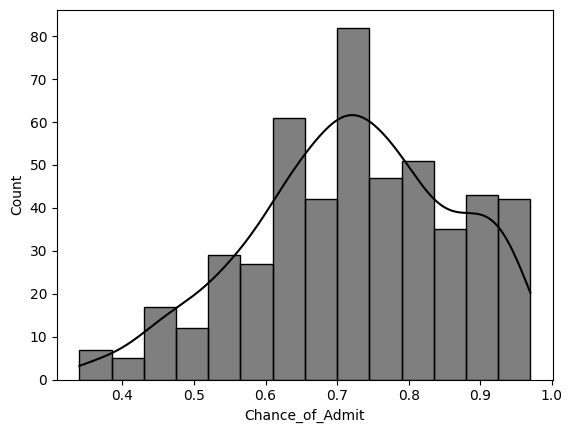

In [57]:
sns.histplot(df,x='Chance_of_Admit',kde=True,color='black')

<Axes: ylabel='Chance_of_Admit'>

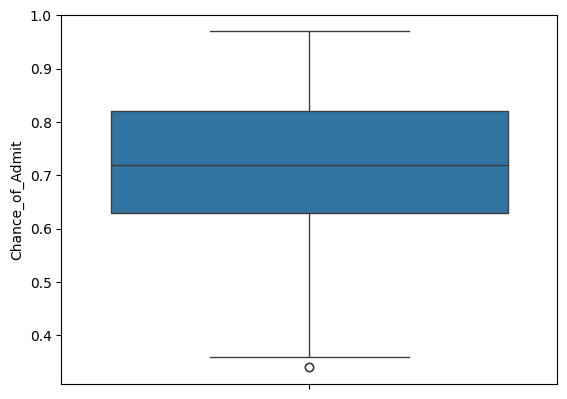

In [58]:
sns.boxplot(df['Chance_of_Admit'])

### Handling outlier in LOR columns

In [59]:
Q1 = df['LOR'].quantile(0.25)
Q3 = df['LOR'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['LOR'] = np.where(df['LOR'] > upper, upper,
                             np.where(df['LOR'] < lower, lower, df['LOR']))


<Axes: xlabel='LOR'>

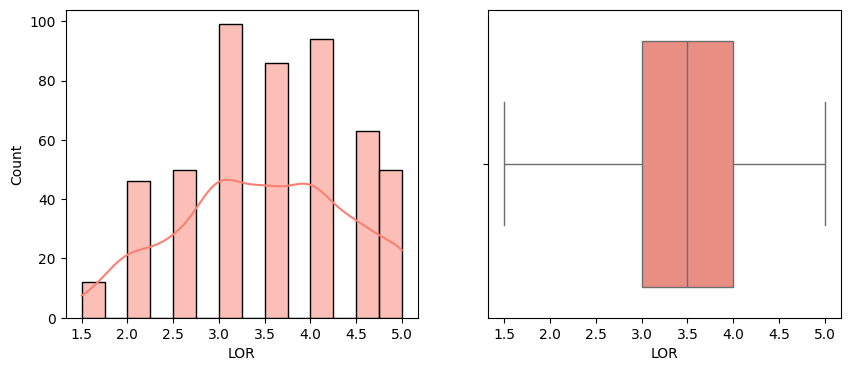

In [60]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df,x='LOR',kde=True,color='salmon')
plt.subplot(1,2,2)
sns.boxplot(df,x='LOR',color='salmon')

In [61]:
Q1 = df['Chance_of_Admit'].quantile(0.25)
Q3 = df['Chance_of_Admit'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['Chance_of_Admit'] = np.where(df['Chance_of_Admit'] > upper, upper,
                             np.where(df['Chance_of_Admit'] < lower, lower, df['Chance_of_Admit']))

<Axes: ylabel='Chance_of_Admit'>

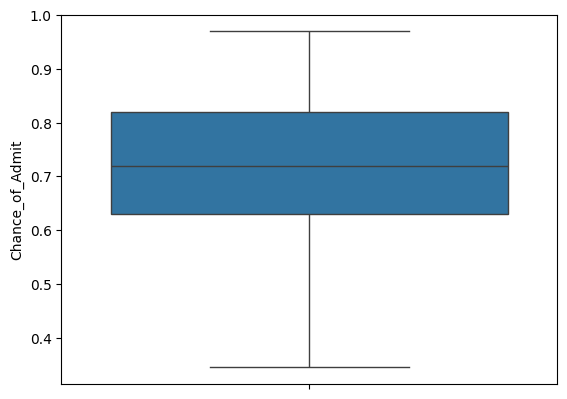

In [62]:
sns.boxplot(df['Chance_of_Admit'])

### Correlation analysis

In [63]:
df.head(3)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


<Axes: >

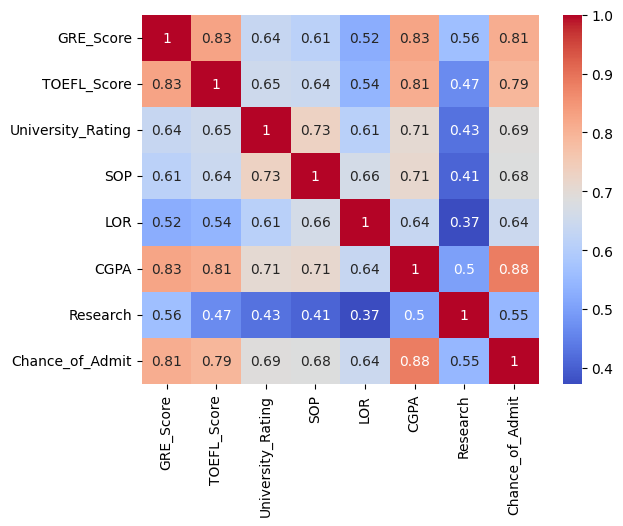

In [64]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [65]:
### CGPA show strongest correlation with "chance of admission"

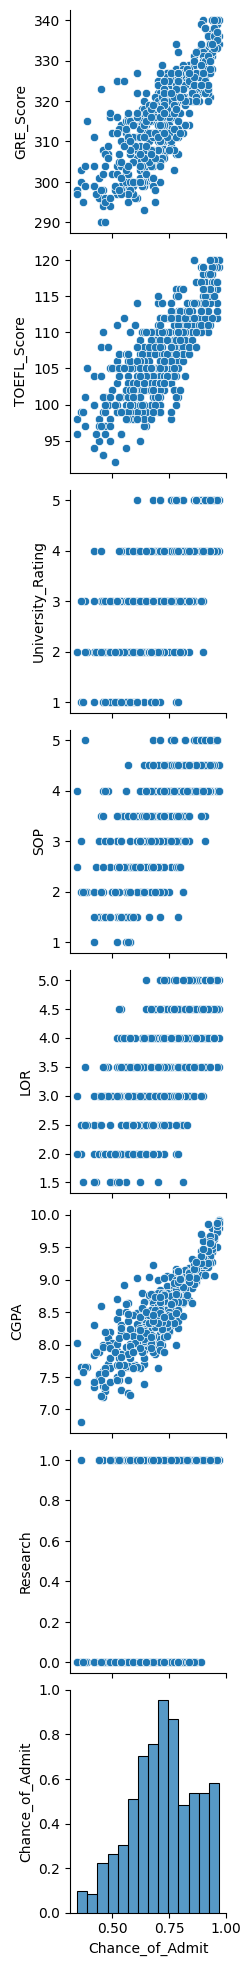

In [66]:

sns.pairplot(df,x_vars='Chance_of_Admit')

## Model building

### Linear regression

In [67]:
df.head(3)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


In [68]:
df.groupby('Research')['Chance_of_Admit'].median()

Research
0    0.645
1    0.800
Name: Chance_of_Admit, dtype: float64

In [69]:
## reserch experience improve admission probability by 16%

In [70]:
df.groupby('University_Rating')['Chance_of_Admit'].median()

University_Rating
1    0.57
2    0.64
3    0.72
4    0.82
5    0.91
Name: Chance_of_Admit, dtype: float64

In [71]:
df.groupby('SOP')['Chance_of_Admit'].median()

SOP
1.0    0.565
1.5    0.540
2.0    0.620
2.5    0.665
3.0    0.700
3.5    0.730
4.0    0.800
4.5    0.870
5.0    0.925
Name: Chance_of_Admit, dtype: float64

In [72]:
df.groupby('LOR')['Chance_of_Admit'].median()

LOR
1.5    0.520
2.0    0.565
2.5    0.650
3.0    0.660
3.5    0.720
4.0    0.770
4.5    0.870
5.0    0.910
Name: Chance_of_Admit, dtype: float64

In [73]:
x=df.drop('Chance_of_Admit',axis=1)
y=df['Chance_of_Admit']

In [74]:
yl=np.log1p(y)

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,yl,test_size=0.2,random_state=45)

In [76]:
x_train.shape

(400, 7)

In [77]:
y_train.shape

(400,)

In [78]:
from sklearn.preprocessing import StandardScaler
slr=StandardScaler()
x_trn_std=slr.fit_transform(x_train)
x_tst_std=slr.transform(x_test)

#### Checking VIF score

In [79]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X= df.drop(['Chance_of_Admit'],axis=1)
X= sm.add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif)


             Feature          VIF
0              const  1511.493918
1          GRE_Score     4.463733
2        TOEFL_Score     3.904258
3  University_Rating     2.621300
4                SOP     2.833239
5                LOR     2.029224
6               CGPA     4.777833
7           Research     1.493982


In [80]:
## linear regression model fit

In [81]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
lr=LinearRegression()
lr.fit(x_trn_std,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [82]:
y_pred=lr.predict(x_tst_std)

In [83]:
### error clt

In [84]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'mse: {mse}')
print(f'mae: {mae}')
print(f'rmse: {np.sqrt(mse)}')
print(f'r2: {r2}')

mse: 0.0011845657109360893
mae: 0.02429005324656119
rmse: 0.03441752040656167
r2: 0.8315675959973069


In [85]:
lr.coef_

array([0.01135681, 0.00951642, 0.00199716, 0.0037998 , 0.00906929,
       0.04234454, 0.00601675])

In [86]:
lr.intercept_

np.float64(0.536727441100531)

In [87]:
rsd = y_test - y_pred
rsd.head()

204    0.011132
481    0.041455
296    0.032046
38     0.002417
298    0.010954
Name: Chance_of_Admit, dtype: float64

In [117]:
rsd.mean()

np.float64(-6.567643101616116e-05)

In [89]:
#### distribution of residuals

<Axes: xlabel='Chance_of_Admit', ylabel='Count'>

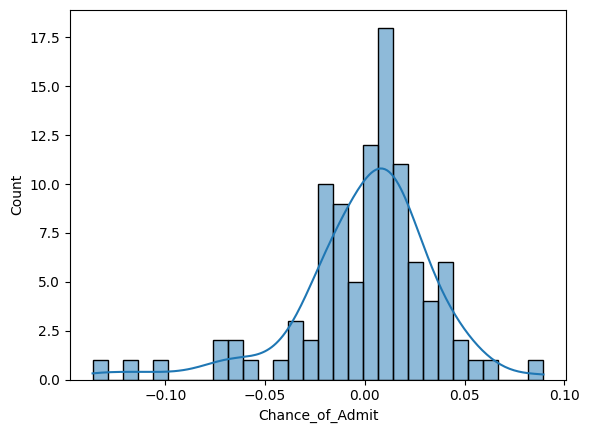

In [90]:
sns.histplot(rsd, kde=True, bins=30)

In [91]:
from scipy.stats import skew
skew(rsd)

np.float64(-1.2208151732017922)

In [92]:
skew(df['Chance_of_Admit'])
## low skewness can be ignored

np.float64(-0.28677048516138615)

In [93]:
### residuals are left skewed
## my model tends to over predict (prediction>actual often)

In [94]:
#### Checking homoscadacity

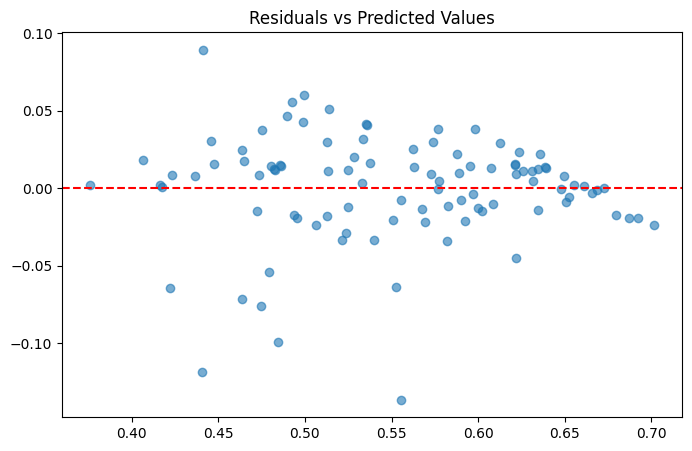

In [95]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred, rsd, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')

plt.show()

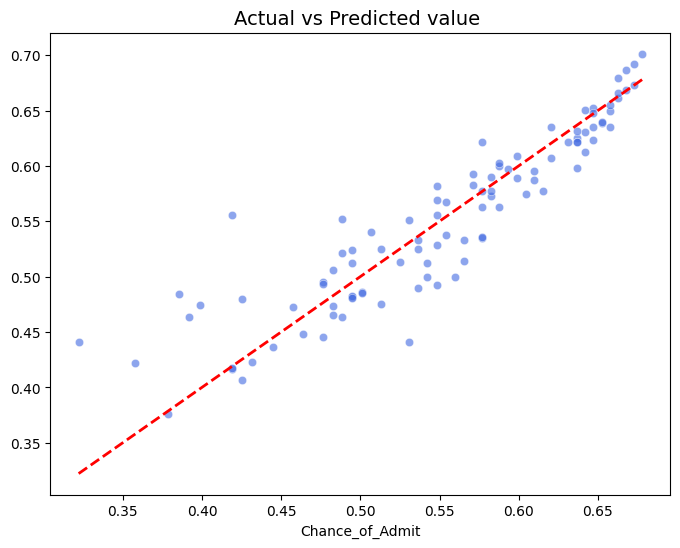

In [96]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2)  # reference line
plt.title('Actual vs Predicted value ', fontsize=14)

plt.show()


In [97]:
#### Q-Q plot

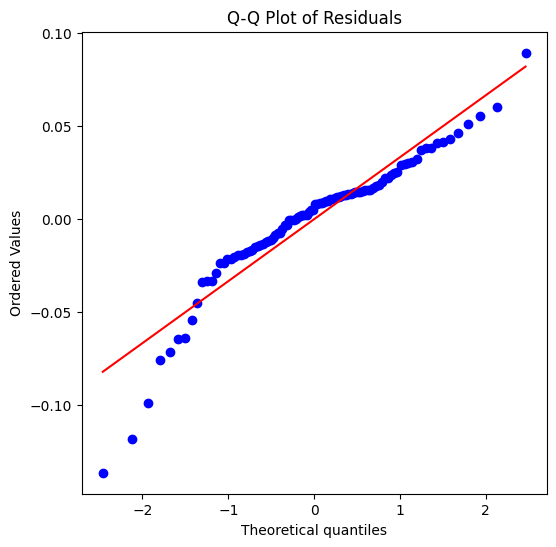

In [98]:
import scipy.stats as stats
plt.figure(figsize=(6,6))
stats.probplot(rsd, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [99]:
## Regression Table

In [100]:
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     324.8
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          6.30e-180
Time:                        20:15:18   Log-Likelihood:                 701.85
No. Observations:                 500   AIC:                            -1388.
Df Residuals:                     492   BIC:                            -1354.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2748      0.104    -12.234      0.000      -1.479      -1.070
GRE_Score             0.0019      0.001      3.695      0.000       0.001       0.003
TOEFL_Score           0.0028      0.001      3.188      0.002       0.001       0.004
University_Rating     0.0059      0.004      1.562      0.119      -0.002       0.013
SOP                   0.0017      0.005      0.368      0.713      -0.007       0.011
LOR                   0.0168      0.004      4.062      0.000       0.009       0.025
CGPA                  0.1184      0.010     12.211      0.000       0.099       0.137
Research              0.0243      0.007      3.682      0.000       0.011       0.037
==============================================================================
Omnibus:                      111.900   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.404
Skew:                          -1.154   Prob(JB):                     7.73e-57
Kurtosis:                       5.661   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ridge and Lasso

In [154]:
from sklearn.linear_model import RidgeCV, LassoCV
alphas = np.logspace(-3, 3, 50)

# RidgeCV
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=5)
ridge_cv.fit(x_trn_std, y_train)
print("Best Alpha for Ridge:", ridge_cv.alpha_)

# LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(x_trn_std, y_train)
print("Best Alpha for Lasso:", lasso_cv.alpha_)


Best Alpha for Ridge: 1.5264179671752334
Best Alpha for Lasso: 0.001


In [159]:
rd = Ridge(alpha=ridge_cv.alpha_)
rd.fit(x_trn_std, y_train)

,alpha,np.float64(1.6496480740980206)
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [160]:
y_pred_rd=rd.predict(x_tst_std)

In [161]:
mseR=mean_squared_error(y_test,y_pred_rd)
maeR=mean_absolute_error(y_test,y_pred_rd)
r2R=r2_score(y_test,y_pred_rd)
print(f'mse: {mseR}')
print(f'mae: {maeR}')
print(f'rmse: {np.sqrt(mseR)}')
print(f'r2: {r2R}')

mse: 0.0011853940394178579
mae: 0.024264118513400525
rmse: 0.034429551832950975
r2: 0.8314498166658607


In [162]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [165]:
rd.coef_


array([0.01158038, 0.0096342 , 0.00210471, 0.00394203, 0.00909894,
       0.04169741, 0.00601573])

In [106]:
rd.intercept_

np.float64(0.536727441100531)

In [128]:
rsd_r = y_test - y_pred_rd
rsd_r.head()

204    0.011460
481    0.041247
296    0.032258
38     0.001909
298    0.011073
Name: Chance_of_Admit, dtype: float64

In [129]:
rsd_r.mean()

np.float64(-5.062348973010389e-05)

<Axes: xlabel='Chance_of_Admit', ylabel='Count'>

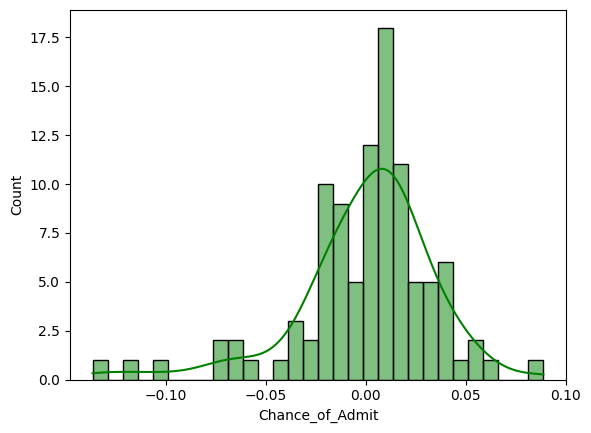

In [132]:
sns.histplot(rsd_r, kde=True, bins=30,color='green')

In [133]:
skew(rsd_r)

np.float64(-1.2360354916116696)

In [107]:
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(x_trn_std, y_train)

,alpha,np.float64(0.001)
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [108]:
y_pred_l=lasso.predict(x_tst_std)

In [109]:
msel=mean_squared_error(y_test,y_pred_l)
mael=mean_absolute_error(y_test,y_pred_l)
r2l=r2_score(y_test,y_pred_l)
print(f'mse: {msel}')
print(f'mae: {mael}')
print(f'rmse: {np.sqrt(msel)}')
print(f'r2: {r2l}')

mse: 0.0011881618436580471
mae: 0.02415472195155342
rmse: 0.03446972357965824
r2: 0.8310562649045021


In [110]:
lasso.coef_

array([0.01120401, 0.00929801, 0.00174956, 0.0035915 , 0.00867907,
       0.04248437, 0.00544885])

In [111]:
lasso.intercept_

np.float64(0.536727441100531)

In [112]:
rsd_l = y_test - y_pred_l
rsd_l.head()

204    0.010434
481    0.041799
296    0.031343
38     0.000443
298    0.012427
Name: Chance_of_Admit, dtype: float64

In [113]:
rsd_l.mean()

np.float64(0.00015912038346709622)

<Axes: xlabel='Chance_of_Admit', ylabel='Count'>

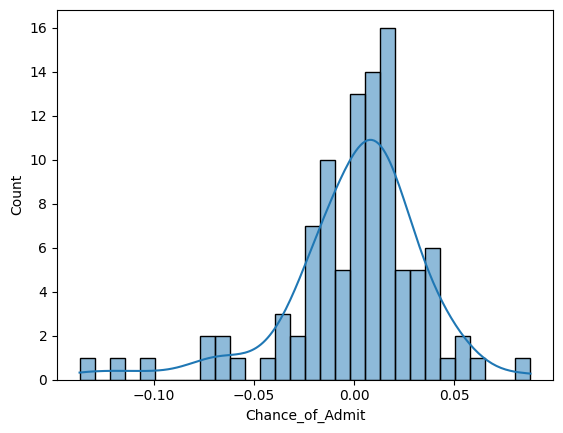

In [114]:
sns.histplot(rsd_l, kde=True, bins=30)

In [115]:
skew(rsd_l)

np.float64(-1.2770445695692074)

#### **Ridge is giving me slightly more stability and balanced fit**

In [168]:
coeff_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': rd.coef_
}).sort_values(by='Coefficient', ascending=False)

coeff_df

,Feature,Coefficient
5,CGPA,0.041697
0,GRE_Score,0.011580
1,TOEFL_Score,0.009634
4,LOR,0.009099
6,Research,0.006016
3,SOP,0.003942
2,University_Rating,0.002105


In [169]:
coeff_df['Relative_Importance_%'] = (
    abs(coeff_df['Coefficient']) / abs(coeff_df['Coefficient']).sum() * 100
)
coeff_df


,Feature,Coefficient,Relative_Importance_%
5,CGPA,0.041697,49.596433
0,GRE_Score,0.011580,13.774135
1,TOEFL_Score,0.009634,11.459268
4,LOR,0.009099,10.822617
6,Research,0.006016,7.155329
3,SOP,0.003942,4.688801
2,University_Rating,0.002105,2.503416


#### **How much does research experience improve admission probability?**
#### Ans- reserch experience improve admission probability by 16%

#### **Is CGPA more influential than GRE in determining admission?**
In this model, CGPA (0.04174468) has a greater positive influence on admission chances than GRE(0.01156427), meaning students with higher
 CGPA are more likely to get admitted

 #### **How does LOR or SOP rating impact outcomes compared to test scores?**
 #### Ans- LOR and SOP rating are less impactfull compared to test score 

## Insight & Recomendation

#### **1. Prioritize Academic Performance (CGPA — 49.6%)**

- CGPA is the most influential factor — nearly half of the total predictive power.
- Maintaining a strong, consistent academic records should be the top priority for students aiming for higher admission chances.
#### **Recommendation:**
- aim for a CGPA above 8.5+ (or equivalent) for top universities.

####  **2. Strengthen GRE Score (13.8%)**

- GRE has the second-highest influence, showing that strong standardized test scores significantly improve admission probability.
#### **Recommendation:**
- Invest time in structured GRE preparation — a higher GRE can compensate partially for a slightly lower CGPA.

#### **3. TOEFL (11.5%)**

English proficiency also matters, especially for international admissions, but the model shows it’s less decisive than CGPA or GRE.


#### **4. LOR (10.8%) — Quality Recommendations Help**

Strong Letters of Recommendation have a notable impact, nearly equal to TOEFL.

#### **Recommendation:**

Seek recommendations from professors or mentors who know your work well and can provide detailed, specific endorsements.

####  **5. Research Experience (7.2%)**

Research experience has a moderate impact, meaning it helps but isn’t a primary driver.

#### **Recommendation:**

Get involved in at least one research project — it strengthens your profile beyond academics.

#### **6. SOP (4.7%) — Adds Personal Value**

Statement of Purpose adds meaningful differentiation but has less numerical influence in the model.

This indicates SOP helps admission committees understand fit and motivation but won’t outweigh low academic scores.

#### **Recommendation:**

Use the SOP to tell your unique story — highlight motivation, career goals, and academic consistency.

####  **7. University Rating (2.5%)**

University rating has the least direct influence, possibly because it overlaps with CGPA and other metrics.

#### **Recommendation:**

Choose universities strategically — focus on fit rather than only prestige, as academic and test performance dominate the outcome.

## Conclusion
This project highlights how data-driven insights can support personalized admission counseling and evidence-based decision-making in the **education sector.**
Future improvements may include exploring non-linear models (e.g., Random Forest, Gradient Boosting) and explainability tools (like SHAP or LIME) to capture complex interactions and enhance interpretability.